In [179]:
import requests
import json

In [245]:
####################

In [229]:
url = 'https://api.pushshift.io/reddit/search/comment/'
parameters = {'subreddit':'pokemon',
              'sort':'desc', # sort by comment time; most recent is first
              'size':500,
              'before':1581553020 # Wednesday, February 12, 2020 7:17:00 PM GMT-05:00
             }

In [274]:
import time

def get_data(url, parameters):
    poke_data = []
    epoch_time = 0
    current_size = 0
    while current_size < 500000:
        #print(parameters['before']) #make sure it's incrementing
        loop_set = json.loads((requests.get(url, params = parameters)).content)['data']
        poke_data.extend(loop_set) # list of dicts ; used extend instead of append 
                                   # so that dictionaries of next set of increments are added as separate dicts
                                   # instead of as a list of 500 dicts
        parameters['before'] = poke_data[-1]['created_utc'] # set comment time of oldest post of of set as the start point of next call
        current_size += parameters['size']
        
        #time.sleep(1) # if they ever rate-limit, use this to take pauses
    return poke_data

In [275]:
poke_data = get_data(url, parameters) # list of dicts

In [276]:
print(len(poke_data)) # check you got the correct number of comments back
# poke_data[0] # check format of data

500000


In [345]:
poke_data #list of dicts
poke_data[0]['created_utc'] > poke_data[1]['created_utc'] > poke_data[-1]['created_utc'] #first is most recent

True

In [277]:
def body_text_only(data): # get comment text only from list of dicts
    return list(map(lambda x: x['body'], data))

In [278]:
poke_comments = body_text_only(poke_data)

In [279]:
poke_data[-1]['created_utc'] # find epoch time of the oldest comment 
#Wednesday, December 4, 2019 1:38:31 PM GMT-05:00

1575484711

In [341]:
poke_data[0]['created_utc'] # Wednesday, February 12, 2020 5:36:34 PM GMT-05:00

1581546994

In [ ]:
################

In [280]:
from bs4 import BeautifulSoup

In [281]:
req_dex = requests.get('https://pokemondb.net/pokedex/game/sword-shield')
req_dex.status_code

200

In [282]:
poke_soup = BeautifulSoup(req_dex.content, 'html.parser')
#poke_soup #look at data

In [283]:
html_poke = poke_soup.find_all(class_ = 'ent-name') # conveniently divided pokemon name to their own class
galar_poke = [html_poke[i].text for i in range(len(html_poke))] # list of all pokemon names as strings

In [284]:
#######################

In [285]:
def count_occurances(comments, the_pokemon = 'Corviknight'):
    count1 = list(filter(lambda x: the_pokemon.lower() in x.lower(), comments))
    return len(count1)

count_occurances(comments = poke_comments, the_pokemon = 'pikachu')

In [286]:
poke_count = dict.fromkeys(galar_poke, 0)

for i in galar_poke:
    poke_count[i] += count_occurances(comments = poke_comments, the_pokemon = i)
    
poke_count

{'Grookey': 626,
 'Thwackey': 62,
 'Rillaboom': 715,
 'Scorbunny': 809,
 'Raboot': 153,
 'Cinderace': 1006,
 'Sobble': 888,
 'Drizzile': 63,
 'Inteleon': 828,
 'Blipbug': 78,
 'Dottler': 39,
 'Orbeetle': 254,
 'Caterpie': 209,
 'Metapod': 139,
 'Butterfree': 546,
 'Grubbin': 63,
 'Charjabug': 52,
 'Vikavolt': 122,
 'Hoothoot': 75,
 'Noctowl': 101,
 'Rookidee': 277,
 'Corvisquire': 43,
 'Corviknight': 843,
 'Skwovet': 97,
 'Greedent': 182,
 'Pidove': 56,
 'Tranquill': 9,
 'Unfezant': 58,
 'Nickit': 104,
 'Thievul': 132,
 'Zigzagoon': 365,
 'Linoone': 168,
 'Obstagoon': 318,
 'Wooloo': 655,
 'Dubwool': 163,
 'Lotad': 156,
 'Lombre': 34,
 'Ludicolo': 286,
 'Seedot': 68,
 'Nuzleaf': 39,
 'Shiftry': 95,
 'Chewtle': 97,
 'Drednaw': 391,
 'Purrloin': 82,
 'Liepard': 57,
 'Yamper': 248,
 'Boltund': 220,
 'Bunnelby': 40,
 'Diggersby': 74,
 'Minccino': 49,
 'Cinccino': 27,
 'Bounsweet': 31,
 'Steenee': 16,
 'Tsareena': 91,
 'Oddish': 210,
 'Gloom': 80,
 'Vileplume': 118,
 'Bellossom': 41,
 'Bude

In [292]:
sorted_dict = {k:v for k,v in sorted(poke_count.items(), key = lambda poke_name: poke_name[1], reverse = True)}

In [297]:
sorted_dict

{'Natu': 4638,
 'Charizard': 4128,
 'Pikachu': 4044,
 'Eevee': 2978,
 'Ditto': 2896,
 'Snom': 2099,
 'Snorlax': 1566,
 'Magikarp': 1497,
 'Zacian': 1495,
 'Meowth': 1193,
 'Eternatus': 1147,
 'Zamazenta': 1115,
 'Charmander': 1075,
 'Gyarados': 1056,
 'Rotom': 1019,
 'Cinderace': 1006,
 'Gengar': 985,
 'Dragapult': 967,
 'Lucario': 927,
 'Sobble': 888,
 'Gardevoir': 873,
 'Toxtricity': 873,
 'Dreepy': 857,
 'Dracovish': 850,
 'Corviknight': 843,
 'Mimikyu': 842,
 'Inteleon': 828,
 'Scorbunny': 809,
 'Lapras': 716,
 'Rillaboom': 715,
 'Umbreon': 668,
 'Falinks': 659,
 'Wooloo': 655,
 'Grookey': 626,
 'Alcremie': 620,
 'Tyranitar': 610,
 'Sylveon': 600,
 'Eiscue': 594,
 'Espeon': 586,
 'Machamp': 574,
 'Appletun': 569,
 'Solrock': 565,
 'Ponyta': 564,
 'Butterfree': 546,
 'Corsola': 508,
 'Grimmsnarl': 508,
 'Hatterene': 500,
 'Shuckle': 483,
 'Flygon': 481,
 'Gallade': 438,
 'Raichu': 438,
 'Arcanine': 424,
 'Flapple': 420,
 'Vaporeon': 416,
 'Rapidash': 416,
 'Aegislash': 414,
 'Darman

In [337]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

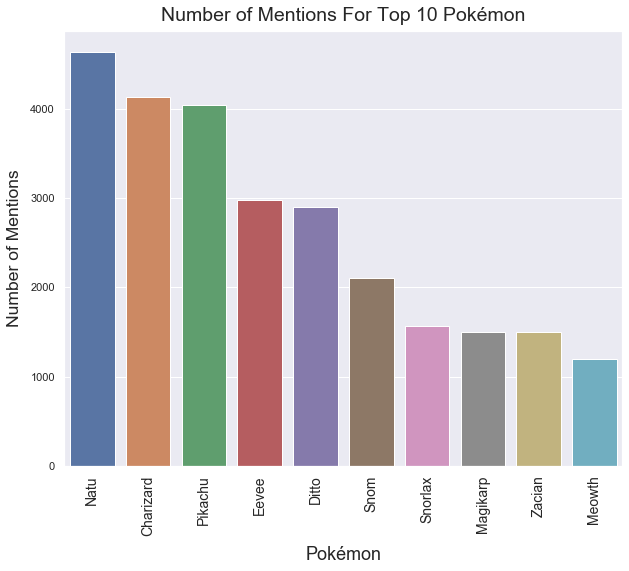

In [340]:
freq_plot = sns.barplot(x = list(sorted_dict.keys())[0:10], y = list(sorted_dict.values())[0:10])
sns.set_style("darkgrid")#, {'grid.linestyle':'-'})
freq_plot.set_xticklabels(freq_plot.get_xticklabels(), rotation = 90, fontdict = {'fontsize':14}) # x-tick label info
freq_plot.axes.set_title('Number of Mentions For Top 10 Pokémon', fontsize = 19.5, pad = 10) # title info
freq_plot.set_xlabel('Pokémon', fontsize = 18, labelpad = 10) # xlabel info
freq_plot.set_ylabel('Number of Mentions', fontsize = 17.5, labelpad = 8) # ylabel info

# sns.palplot(sns.diverging_palette(255,133,l=60,n=7,center='dark'))
sns.set(rc = {'figure.figsize':(10,8)})
plt.show()

In [ ]:
########################

In [342]:
indices = [i for i, x in enumerate(poke_comments) if 'natu' in x.lower()]

In [343]:
indices

[181,
 188,
 310,
 350,
 539,
 618,
 643,
 679,
 963,
 980,
 1131,
 1161,
 1321,
 1651,
 1774,
 1798,
 1817,
 1873,
 1880,
 1965,
 1969,
 2020,
 2065,
 2253,
 2325,
 2427,
 2619,
 2710,
 2796,
 2825,
 2868,
 2909,
 2932,
 2967,
 3000,
 3036,
 3053,
 3064,
 3187,
 3533,
 3691,
 4258,
 4433,
 4588,
 4764,
 4919,
 5137,
 5153,
 5182,
 5363,
 5378,
 5477,
 5537,
 5829,
 6063,
 6123,
 6342,
 6346,
 6411,
 6508,
 6992,
 7336,
 7339,
 7351,
 7463,
 7470,
 7777,
 7828,
 7916,
 8075,
 8109,
 8188,
 8318,
 8704,
 8732,
 8761,
 8907,
 8959,
 9043,
 9044,
 9325,
 9360,
 9543,
 10151,
 10233,
 10481,
 10515,
 10623,
 10631,
 10637,
 10638,
 10800,
 10863,
 11802,
 11864,
 11922,
 12309,
 12692,
 12700,
 12777,
 12932,
 13005,
 13114,
 13213,
 13224,
 13357,
 13363,
 13497,
 13794,
 13846,
 13855,
 14343,
 14605,
 14679,
 15283,
 15308,
 15587,
 15695,
 15705,
 15855,
 15926,
 15937,
 16174,
 16459,
 16855,
 16869,
 17007,
 17033,
 17062,
 17139,
 17329,
 17342,
 17502,
 17626,
 17777,
 17821,
 1783

In [344]:
[poke_comments[i] for i in indices[0:10]]

["Yeah, that's the problem with their... special situation. Not easy to just work in naturally.",
 'Honestly when I first saw eternatus I thought "oh, I didn\'t realize we were going to have UBs in this game"',
 'Because naganadel is an upgrade of dragalge, not eternatus in my opinion.',
 'If necrozma can survive than light that burns the sky will devastate eternatus',
 "Point is that Zamazenta **can** fill a role. Doesn't mean it's good at it (also Zamazenta is good for solo raids with the reflect/light screen combo for fairy types. Anything else? Eternatus)",
 "Well yeah, their personality, not their looks, their base forms are great, but raboot and drizzile look more like teenagers, not animals, and it's better to look like animals that teen furrsona (to me anyways), thwackey is the only natural looking progression, personality is good, but imo, it should stay in how they act, not how they look",
 "With 12 Spe investment, it can outspeed Dragapult under tailwind. I'm not 100% if tha